In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

% matplotlib inline

sns.set(context='notebook',font='simhei',style='whitegrid')

UsageError: Line magic function `%` not found.


In [9]:
with open("a1.txt",'r') as load_f:
    
    cj_dict = json.load(load_f)
with open('student_id_count_map.txt','r') as load_y:
    book_dict=json.load(load_y)
    
with open('daily_cost.txt','r') as load_y:
    cost_dict=json.load(load_y)

In [8]:
cj_list[4000:5000], bo_list[4000:5000]

([], [])

In [10]:
cj = pd.DataFrame({'绩点':cj_dict})
book= pd.DataFrame({'借书数':book_dict})
cost= pd.DataFrame({'日常玉兰卡消费':cost_dict})
al=pd.merge(cj,book,how='left',left_index=True,right_index=True).fillna(0)
al=pd.merge(al,cost,how='left',left_index=True,right_index=True).fillna(0)
print(al)

                 绩点    借书数  日常玉兰卡消费
201400001  0.828058   24.0    68.66
201400002  0.904110    0.0   212.46
201400003  1.676540    5.0    82.94
201400004  1.143301    0.0   268.48
201400005  1.702133    1.0    94.54
201400006  0.863309    0.0     0.00
201400007  1.190674    1.0   131.60
201400008  1.356386    9.0    21.99
201400009  1.745131    0.0    75.70
201400011  2.735476    5.0     0.00
201400012  2.531339  123.0     0.00
201400013  2.639607   74.0     0.00
201400014  1.596528   27.0     0.00
201400015  2.334358    0.0     0.00
201400016  2.407160   70.0     0.00
201400017  2.390608   50.0     0.00
201400018  1.989801    0.0     0.00
201400019  1.556125  208.0     0.00
201400021  2.347011   71.0     0.00
201400022  2.481250   58.0     0.00
201400023  2.574664   37.0     0.00
201400024  2.236857   68.0     0.00
201400025  2.356286   27.0     0.00
201400026  2.282038   22.0     0.00
201400027  2.432286   36.0     0.00
201400028  2.497472   66.0     0.00
201400029  2.593722   79.0  

In [6]:
n=0
for i,j in al.iterrows():
    if j['日常玉兰卡消费']==0:
        n+=1
print(n)

12798


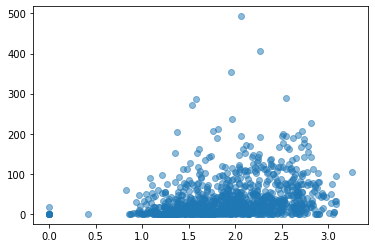

In [15]:

plt.scatter(al['绩点'][3000:4000], al['借书数'][3000:4000],alpha=0.5)

plt.show()

In [7]:

cj_list=[]
bo_list=[]

for key in dic:
    if dic[key][1]<=100:
        cj_list.append(dic[key][0])
        bo_list.append(dic[key][1])
    
g_s_m = pd.Series(cj_list) 
g_a_d = pd.Series(bo_list)
 
corr_gust = round(g_s_m.corr(g_a_d), 4)
print('corr_gust :', corr_gust)
 

plt.scatter(al['绩点'], al['借书数'],alpha=0.5)

plt.show()

NameError: name 'dic' is not defined

In [18]:
import pandas as pd
import numpy as np
import seaborn as sn
from numpy import random
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import VotingClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [19]:
x_train,x_test,y_train,y_test = train_test_split(al['借书数'], al['绩点'],random_state=1,train_size=0.7)

In [25]:
#回归算法的正确性评判
def r_fit_models(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    test_predict = model.predict(x_test)
    for i in range(len(test_predict)):
        test_predict[i] = round(test_predict[i])
    print("{}测试集准确率：{}".format(name, accuracy_score(y_test, test_predict)))
    sn.heatmap(confusion_matrix(y_test, test_predict), annot = True, cmap = cmap)
    return accuracy_score(y_test,test_predict)

In [20]:
#回归算法
r_names = ["RFR", "GBR", "ETR", "LGR", "XGR", "SVM"]
r_models = [RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(),
            lgb.LGBMRegressor(),XGBRegressor(),svm.SVC(C=1.0,kernel='linear')]

GBR = GradientBoostingRegressor()
ETR = ExtraTreesRegressor()
LGR = lgb.LGBMRegressor()
XGR = XGBRegressor()

In [27]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  1. 17. ... 12. 18.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
# 回归模型
for name, model in zip(r_names, r_models):
    r_fit_models(name, model, x_train, y_train, x_test, y_test)

d:\users\katsu\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  1. 17. ... 12. 18.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.